# Testes Estatísticos

In [33]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

### Qui-Quadrado

### Exercício 1.

a) Obtendo dados e Valor esperado

In [4]:
k = np.arange(9)
OBS = np.array([215, 1485, 5331, 10649, 14959, 11929, 6678, 2092, 342])
ESP = np.array([165.22, 1401.69, 5202.65, 11034.65, 14627.60, 12409.87, 6580.24, 1993.78, 264.30])

In [29]:
theta = 0.51

In [32]:
ESP_values = [stats.binom.pmf(i, 8, theta)*53680 for i in k]
ESP_values

[178.39437129761814,
 1485.4061936618043,
 5411.122562625125,
 11263.9694160768,
 14654.654087242783,
 12202.242586928678,
 6350.146652381254,
 1888.3818033320351,
 245.6823264539126]

b) Qui-quadrado $X^2 = \sum_{k} \frac{(N_{K} - E_{k})^2}{E_{k}} $

In [6]:
X2 = np.sum(np.power(OBS - ESP, 2) / ESP)
X2

91.8694734521381

c) Distribuição de referência dessa estatística é a Binomial(n, $\theta$)

d) p-valor

In [7]:
cumulative = stats.chi2.cdf(X2, 7)
p_valor = 1 - cumulative
p_valor

0.0

### Exercício 2.


**A)** Para estimar lambda da distribuição de poisson pode-se retirar a média dos valores observados.

$\lambda = E(X) \approx \overline{X} = \frac{0\cdot0 + 1\cdot20 + 2\cdot43  + ... 16\cdot0}{400}$

Tendo $\lambda$ e $k$, podemos calcular os valores esperados através de:

$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$ 

$E(X=k) = 400 \cdot P(X=k)$

Os valores obtidos, como é possível ver abaixo, são muito próximos dos valores esperados fornecidos na tabela

In [12]:
k = np.arange(17)
OBS = np.array([0, 20, 43, 53, 86, 70, 54, 37, 18, 10, 5, 2, 2, 0, 0, 0, 0])
ESP = np.array([3.71, 17.37, 40.65, 63.41, 74.19, 69.44, 54.16, 36.21, 21.18, 11.02, 5.16, 2.19, 0.86, 0.31,0.10, 0.03, 0.03])

In [18]:
lambda_ = np.sum(k*OBS) / 400
lambda_

4.68

In [20]:
ESP_values = [stats.poisson.pmf(i, lambda_)*400 for i in k]
ESP_values

[3.7116055548258977,
 17.3703139965852,
 40.64653475200936,
 63.40859421313459,
 74.18805522936746,
 69.44001969468796,
 54.16321536185659,
 36.2119782704984,
 21.184007288241553,
 11.01568378988562,
 5.155340013666463,
 2.193362842178095,
 0.8554115084494589,
 0.3079481430418053,
 0.10294266495968882,
 0.03211811146742289,
 0.009394547604221192]

**B)** A estatística qui-quadrado é igual a 10.43 (cálculo abaixo)

In [6]:
X2 = np.sum(np.power(OBS - ESP, 2) / ESP)
X2

10.429749064734294

**C)** Com grau de liberade igual $k = 17-1-1 = 15$, obtem-se o p-valor igual a 0.79. Portanto, pode-se dizer que os dados são compatíveis com a hipótese.

In [7]:
cumulative = stats.chi2.cdf(X2, 15)
p_valor = 1 - cumulative
p_valor

0.7918726742268025

## Teste de Kolmogorov-Smirnov


### Exercício 1.

Simulação do Teste de Kolmogorov-Smirnov.

In [8]:
D = []
p_value = []
for _ in range(1000):
    x = np.random.normal(0, 1, 100)
    res = stats.kstest(x, stats.norm.cdf)
    D.append(res[0])
    p_value.append(res[1])

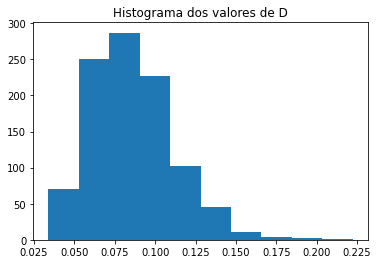

In [9]:
plt.hist(D)
plt.title('Histograma dos valores de D')
plt.show()

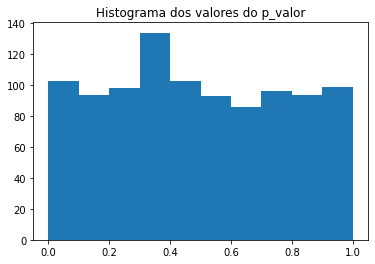

In [10]:
plt.hist(p_value)
plt.title('Histograma dos valores do p_valor')
plt.show()

0.046 dos p_valores simulados ficaram abaixo de 0.05

In [11]:
proportion = len([x for x in set(p_value) if x < 0.05]) / 1000
proportion

0.046

### Exercício 2.


Dados de tamanhos dos arquivos em uma pasta contendo alguns dos trabalhos desenvolvidos durante o curso de Ciência da Computação. O comando utilizado para coletar os dados foi:

```console
(@For /F "Delims=" %A in ('dir Documents /B/S/A-D') Do @Echo %~fA,%~zA) > doc_files.csv
```

Isso gera um arquivo csv contendo duas colunas separadas por vírgula: nome e tamanho do arquivo em Bytes. Ao todo, tem 32456 linhas.

In [64]:
df = pd.read_csv('doc_files.csv', encoding='windows-1252', header=None)
df.head()

,0,1
0,C:\Users\Jackson\Documents\Arquivos no meu com...,714
1,C:\Users\Jackson\Documents\Meus arquivos no Dr...,845
2,C:\Users\Jackson\Documents\Algebra A\a.exe,152598
3,C:\Users\Jackson\Documents\Algebra A\tp1.c,1027
4,C:\Users\Jackson\Documents\Algebra A\tp1.o,1636


In [65]:
df.shape

(32456, 2)

In [66]:
min_size = df[1].values.min()
max_size = df[1].values.max()
print(min_size)
print(max_size)

0
368696618


Ao agrupar os arquivos em intervalos de tamanho e fazer a contagem, percebe-se que existe um único arquivo muito grande que está atrapalhando a distribuição, então optei por removê-lo

In [67]:
sample = df[1].value_counts(bins=30, sort=False)
sample

(-368696.619, 12289887.267]       32434
(12289887.267, 24579774.533]          4
(24579774.533, 36869661.8]           11
(36869661.8, 49159549.067]            6
(49159549.067, 61449436.333]          0
(61449436.333, 73739323.6]            0
(73739323.6, 86029210.867]            0
(86029210.867, 98319098.133]          0
(98319098.133, 110608985.4]           0
(110608985.4, 122898872.667]          0
(122898872.667, 135188759.933]        0
(135188759.933, 147478647.2]          0
(147478647.2, 159768534.467]          0
(159768534.467, 172058421.733]        0
(172058421.733, 184348309.0]          0
(184348309.0, 196638196.267]          0
(196638196.267, 208928083.533]        0
(208928083.533, 221217970.8]          0
(221217970.8, 233507858.067]          0
(233507858.067, 245797745.333]        0
(245797745.333, 258087632.6]          0
(258087632.6, 270377519.867]          0
(270377519.867, 282667407.133]        0
(282667407.133, 294957294.4]          0
(294957294.4, 307247181.667]          0


In [68]:
new_df = df.drop(df[df[1] > 61449436].index)

In [69]:
sample = new_df[1].value_counts(bins=30, sort=False)
sample

(-46040.94899999999, 1534698.267]    32379
(1534698.267, 3069396.533]              17
(3069396.533, 4604094.8]                 7
(4604094.8, 6138793.067]                 0
(6138793.067, 7673491.333]               0
(7673491.333, 9208189.6]                31
(9208189.6, 10742887.867]                0
(10742887.867, 12277586.133]             0
(12277586.133, 13812284.4]               3
(13812284.4, 15346982.667]               0
(15346982.667, 16881680.933]             0
(16881680.933, 18416379.2]               0
(18416379.2, 19951077.467]               1
(19951077.467, 21485775.733]             0
(21485775.733, 23020474.0]               0
(23020474.0, 24555172.267]               0
(24555172.267, 26089870.533]            10
(26089870.533, 27624568.8]               0
(27624568.8, 29159267.067]               0
(29159267.067, 30693965.333]             0
(30693965.333, 32228663.6]               0
(32228663.6, 33763361.867]               0
(33763361.867, 35298060.133]             0
(35298060.1

Há muitos arquivos concentrados em um único intervalo, talvez siga uma distribuição Pareto (Não sei como comparar nesse caso, visto que P(k=0) = 0 na Pareto

In [98]:
OBS = np.asarray(sample)
k = np.arange(OBS.size)
ESP = np.array([(stats.pareto.pdf(i, 1)*32455) for i in k])

In [99]:
ESP

array([    0.        , 32455.        ,  8113.75      ,  3606.11111111,
        2028.4375    ,  1298.2       ,   901.52777778,   662.34693878,
         507.109375  ,   400.67901235,   324.55      ,   268.2231405 ,
         225.38194444,   192.04142012,   165.58673469,   144.24444444,
         126.77734375,   112.30103806,   100.16975309,    89.90304709,
          81.1375    ,    73.59410431,    67.05578512,    61.35160681,
          56.34548611,    51.928     ,    48.01035503,    44.51989026,
          41.39668367,    38.59096314])

In [100]:
X2 = np.sum(np.power(OBS - ESP, 2) / ESP)
X2

C:\Users\Jackson\AppData\Local\Temp\ipykernel_103396\2916991136.py:1: RuntimeWarning: divide by zero encountered in true_divide
  X2 = np.sum(np.power(OBS - ESP, 2) / ESP)


inf

### Exercício 3.


a) Estimando $E(X)$ através da média

In [109]:
N = 537
k = np.arange(6)
OBS = np.array([229, 211, 93, 35, 7, 1])

In [113]:
EX = np.sum(k*OBS) / 576
EX

0.9288194444444444

In [114]:
theta = 0.696

b) Obtendo valores esperados

In [118]:
def log_pmf(k, theta):
    return (-1/np.log(1-theta))*(theta**k)/k

In [119]:
ESP_values = [log_pmf(i, theta)*576 for i in k+1]
ESP_values

[336.6815445864994,
 117.16517751610179,
 54.36464236747123,
 28.37834331581998,
 15.801061558248561,
 9.164615703784166]

c) Qui-quadrado. Resultado de 150.77

In [120]:
X2 = np.sum(np.power(OBS - ESP_values, 2) / ESP_values)
X2

150.76802966590856

d) p-valor igual a 0. Amostra não se ajusta

In [122]:
cumulative = stats.chi2.cdf(X2, 4)
p_valor = 1 - cumulative
p_valor

0.0

### Exercício 4.


O valor esperado da uniforme é 608/10 = 60,8 para todo k. O qui-quadrado é igual a 7.5 e, com 9 graus de liberdade, obtemos um p-valor de 0.58 > 0.05, portanto podemos afirmar que segue uma distribuição uniforme

In [124]:
k = np.arange(10)
OBS = np.array([60, 62, 67, 68, 64, 56, 62, 44, 58, 67])
ESP = np.array([60.8 for _ in range(k.size)])
N = 608

In [126]:
X2 = np.sum(np.power(OBS - ESP, 2) / ESP)
X2

7.493421052631579

In [127]:
cumulative = stats.chi2.cdf(X2, 9)
p_valor = 1 - cumulative
p_valor

0.5858880273157883